IMPORTING ALL THE REQUIRED LIBRARIES 

In [58]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,accuracy_score
from math import sqrt
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

READING THE DATASET USING PANDAS LIBRARY

In [59]:
confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


DATA PREPROCESSING:

CHECKING FOR THE NULL VALUES IN THE DATASET

In [60]:
confirmed.isnull().sum()

Province/State    185
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
9/17/20             0
9/18/20             0
9/19/20             0
9/20/20             0
9/21/20             0
Length: 248, dtype: int64

FILLING THE MISSING VALUES WITH THEIR RESPECTIVE COUNTRY NAMES

In [61]:
confirmed["Province/State"] = confirmed["Province/State"].fillna(confirmed["Country/Region"])

In [62]:
confirmed.isnull().sum()

Province/State    0
Country/Region    0
Lat               0
Long              0
1/22/20           0
                 ..
9/17/20           0
9/18/20           0
9/19/20           0
9/20/20           0
9/21/20           0
Length: 248, dtype: int64

In [63]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,Albania,Albania,41.15330,20.168300,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,Algeria,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,Andorra,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,Angola,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


DROPPING THE COLUMNS WHICH ARE NOT MUCH NECESSARY FOR PREDICTION

In [64]:
confirmed.drop(["Country/Region","Lat","Long"],inplace=True,axis=1)

In [65]:
confirmed.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
1,Albania,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
2,Algeria,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
3,Andorra,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
4,Angola,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [66]:
confirmed.describe()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,30.954887,37.315789,...,1.081163e+05,1.090052e+05,1.100551e+05,1.111201e+05,1.122630e+05,1.134410e+05,1.146599e+05,1.157171e+05,1.166240e+05,1.174654e+05
std,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,303.897894,360.297673,...,5.678329e+05,5.727452e+05,5.774877e+05,5.831820e+05,5.891235e+05,5.953081e+05,6.017349e+05,6.076737e+05,6.126599e+05,6.154886e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.672500e+02,4.675000e+02,4.675000e+02,4.682500e+02,4.682500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.707500e+02,4.710000e+02
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.354500e+03,3.381000e+03,3.397000e+03,3.459000e+03,3.466000e+03,3.522500e+03,3.608000e+03,3.714500e+03,3.772000e+03,3.823500e+03
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.472475e+04,3.540750e+04,3.553900e+04,3.580200e+04,3.599400e+04,3.639525e+04,3.670825e+04,3.731275e+04,3.781650e+04,3.826325e+04
max,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,4903.000000,5806.000000,...,6.485123e+06,6.520122e+06,6.553652e+06,6.592342e+06,6.630051e+06,6.674411e+06,6.723933e+06,6.768119e+06,6.804814e+06,6.856884e+06


SET THE PROVINCE/STATE COLUMN AS INDEX FOR EASY UNDERSTANDING

In [67]:
highest_cases = confirmed.set_index("Province/State")
highest_cases.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38641,38716,38772,38815,38855,38872,38883,38919,39044,39074
Albania,0,0,0,0,0,0,0,0,0,0,...,11185,11353,11520,11672,11816,11948,12073,12226,12385,12535
Algeria,0,0,0,0,0,0,0,0,0,0,...,48007,48254,48496,48734,48966,49194,49413,49623,49826,50023
Andorra,0,0,0,0,0,0,0,0,0,0,...,1344,1344,1438,1438,1483,1483,1564,1564,1564,1681
Angola,0,0,0,0,0,0,0,0,0,0,...,3335,3388,3439,3569,3675,3789,3848,3901,3991,4117


In [68]:
#SELECTING FIVE COUNTRIES TO MAKE THE FUTURE PREDICTIONS
highest_cases = highest_cases.loc[["US","Brazil","Russia","Colombia","Peru"]]
highest_cases

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,09-12-2020,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
Province/State,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,5,5,7,...,6485123,6520122,6553652,6592342,6630051,6674411,6723933,6768119,6804814,6856884
Brazil,0,0,0,0,0,0,0,0,0,0,...,4315687,4330455,4345610,4382263,4419083,4455386,4495183,4528240,4544629,4558040
Russia,0,0,0,0,0,0,0,0,0,2,...,1053663,1059024,1064438,1069873,1075485,1081152,1086955,1092915,1098958,1105048
Colombia,0,0,0,0,0,0,0,0,0,0,...,708964,716319,721892,728590,736377,743945,750471,758398,765076,770435
Peru,0,0,0,0,0,0,0,0,0,0,...,716670,722832,729619,733860,738020,744400,750098,756412,762865,768895


In [69]:
#APPLYING TRANSPOSE FOR BETTER PLOTTING OF PREDICTIONS
highest_cases = highest_cases.T
highest_cases.head()

Province/State,US,Brazil,Russia,Colombia,Peru
1/22/20,1,0,0,0,0
1/23/20,1,0,0,0,0
1/24/20,2,0,0,0,0
1/25/20,2,0,0,0,0
1/26/20,5,0,0,0,0


PLOTTING THE COVID CASES OF 5 FIVE WITH MOST HIGHEST INCREASE RATE

<AxesSubplot:>

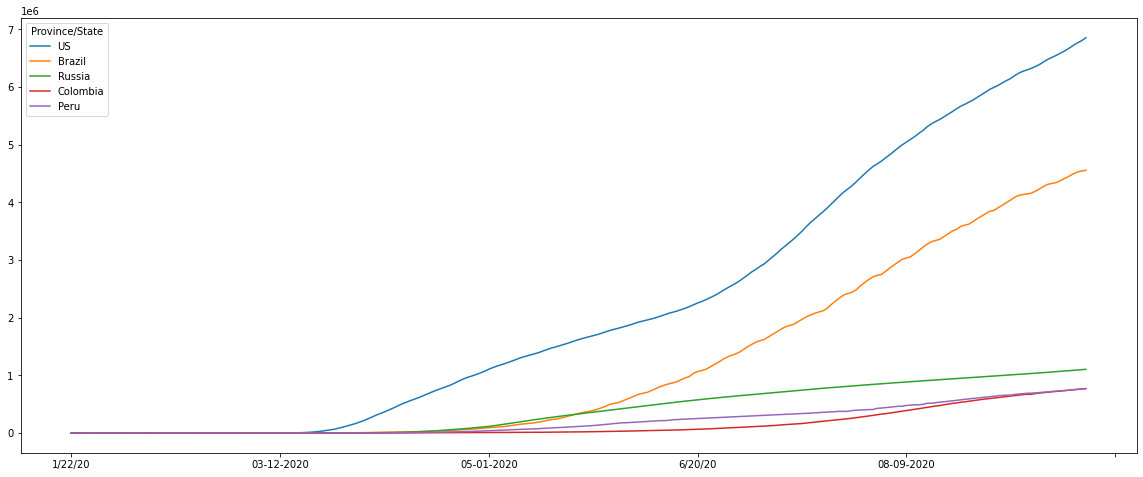

In [70]:
highest_cases.plot(figsize=(20,8))

THIS TIME SERIES MODEL CAN BE SOLVED IN TWO WAYS
1. USING ARIMA MODEL
2. USING MACHINE LEARNING MODELS


CHECKING THE STATIONARITY:
AUGUMENTED DICKEY FULLER TEST(ADF Test) 
1. USING ARIMA MODEL

In [71]:
def ad_test(dataset):
    dftest = adfuller(dataset, autolag = 'AIC')
    print("ADF: ", dftest[0])
    print("P-value: ", dftest[1])
    print("Num of lags used: ", dftest[2])
    print("Critical values: ")
    for key, val in dftest[4].items():
        print("\t",key, ": ",val)

In [72]:
countries = ["US","Brazil","Russia","Colombia","Peru"]
ad_test_results=[]
for i in countries:
    ad_test_results.append(ad_test(highest_cases[i]))

ADF:  2.101425405313563
P-value:  0.9987910822263308
Num of lags used:  11
Critical values: 
	 1% :  -3.458854867412691
	 5% :  -2.8740800599399323
	 10% :  -2.573453223097503
ADF:  -3.3642199061719227
P-value:  0.012240792414535934
Num of lags used:  14
Critical values: 
	 1% :  -3.4592326027153493
	 5% :  -2.8742454699025872
	 10% :  -2.5735414688888465
ADF:  -0.49949192534786213
P-value:  0.8921156058243067
Num of lags used:  12
Critical values: 
	 1% :  -3.4589796764641
	 5% :  -2.8741347158661448
	 10% :  -2.573482381701992
ADF:  -1.4348831350300977
P-value:  0.5654432250123543
Num of lags used:  12
Critical values: 
	 1% :  -3.4589796764641
	 5% :  -2.8741347158661448
	 10% :  -2.573482381701992
ADF:  0.5503355494913358
P-value:  0.9863253173040359
Num of lags used:  7
Critical values: 
	 1% :  -3.4583663275730476
	 5% :  -2.8738660999177132
	 10% :  -2.5733390785693766


In the above result we have found the different notations for 5 countries. For checking whether the specific country is stationary or not we have 2 ways:
1. If P-value < 5%(0.05) - we can reject the null hypothesis and model is said to be stationary, else it is said to be non-stationary
2. If ADF value < Critical Value - model is said to be stationary, else it is said to be non-stationary

To get better prediction, we prefer the model to be in stationary, so we need to apply some transformations like "log","sqrt","1st difference of sqrt" etc. to make better predictions

In [73]:
#US
highest_cases["US_sqrt"] = np.sqrt(highest_cases["US"])
highest_cases["US_sqrt_diff"] = highest_cases["US_sqrt"] - highest_cases["US_sqrt"].shift(1)
#highest_cases["US_sqrt_diff"].plot(figsize=(20,8),legend=True)
# Russia
highest_cases["R_sqrt"] = np.sqrt(highest_cases["Russia"])
highest_cases["R_sqrt_diff"] = highest_cases["R_sqrt"] - highest_cases["R_sqrt"].shift(1)
#highest_cases["R_sqrt_diff"].plot(figsize=(20,8),legend=True)
#Brazil
highest_cases["B_sqrt"] = np.sqrt(highest_cases["Brazil"])
highest_cases["B_sqrt_diff"] = highest_cases["B_sqrt"] - highest_cases["B_sqrt"].shift(1)
#highest_cases["B_sqrt_diff"].plot(figsize=(20,8),legend=True)
#Colombia
highest_cases["C_sqrt"] = np.sqrt(highest_cases["Colombia"])
highest_cases["C_sqrt_diff"] = highest_cases["C_sqrt"] - highest_cases["C_sqrt"].shift(1)
#highest_cases["C_sqrt_diff"].plot(figsize=(20,8),legend=True)
#Peru
highest_cases["PE_sqrt"]=np.sqrt(highest_cases["Peru"])
highest_cases["PE_sqrt_diff"] = highest_cases["PE_sqrt"] - highest_cases["PE_sqrt"].shift(1)
#highest_cases["PE_sqrt_diff"].plot(figsize=(20,8),legend=True)


In [74]:
#Replacing inf values with nan and then dropping them
highest_cases=highest_cases.replace([np.inf,-np.inf],np.nan).dropna()
highest_cases.head()

Province/State,US,Brazil,Russia,Colombia,Peru,US_sqrt,US_sqrt_diff,R_sqrt,R_sqrt_diff,B_sqrt,B_sqrt_diff,C_sqrt,C_sqrt_diff,PE_sqrt,PE_sqrt_diff
1/23/20,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,2,0,0,0,0,1.414214,0.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,2,0,0,0,0,1.414214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,5,0,0,0,0,2.236068,0.821854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,5,0,0,0,0,2.236068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
#Now check the stationarity using ADF test, which have better values than before
ad_test(highest_cases["R_sqrt_diff"])
ad_test(highest_cases["US_sqrt_diff"])
ad_test(highest_cases["B_sqrt_diff"])
ad_test(highest_cases["C_sqrt_diff"])
ad_test(highest_cases["PE_sqrt_diff"])

ADF:  -1.6942351885771156
P-value:  0.43408510209701145
Num of lags used:  13
Critical values: 
	 1% :  -3.4592326027153493
	 5% :  -2.8742454699025872
	 10% :  -2.5735414688888465
ADF:  -3.2456788082559327
P-value:  0.017488258674467266
Num of lags used:  15
Critical values: 
	 1% :  -3.4594900381360034
	 5% :  -2.8743581895178485
	 10% :  -2.573601605503697
ADF:  -1.5868453802506572
P-value:  0.49019807999398557
Num of lags used:  15
Critical values: 
	 1% :  -3.4594900381360034
	 5% :  -2.8743581895178485
	 10% :  -2.573601605503697
ADF:  -1.2580510233779527
P-value:  0.6481389836814431
Num of lags used:  6
Critical values: 
	 1% :  -3.4583663275730476
	 5% :  -2.8738660999177132
	 10% :  -2.5733390785693766
ADF:  -1.9015160312067652
P-value:  0.3313482582388624
Num of lags used:  6
Critical values: 
	 1% :  -3.4583663275730476
	 5% :  -2.8738660999177132
	 10% :  -2.5733390785693766


RUNNING THE AUTO_ARIMA ON 5 COUNTRIES TO KNOW THE BEST ARIMA MODEL FOR FUTHER PREDICTIONS

In [76]:
stepwise_fit = auto_arima(highest_cases["R_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["US_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["B_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["C_sqrt_diff"],trace=True,suppress_warnings=True)
stepwise_fit = auto_arima(highest_cases["PE_sqrt_diff"],trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=485.433, Time=0.72 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=512.937, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=481.086, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=485.753, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=511.009, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=483.082, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=483.083, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=480.899, Time=0.61 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=481.751, Time=0.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=484.038, Time=0.49 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=484.167, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=482.011, Time=1.92 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=478.952, Time=0.52 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=481.238, Time=0.12 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=481.2

In [77]:
print(highest_cases.shape)

(243, 15)


SPLITTING THE DATA INTO TRAIN AND TEST. CONSIDER THE PERCENTAGE AS TRAIN:87% TEST:13% 

In [78]:
train_cases = highest_cases.iloc[:-30]
test_cases = highest_cases.iloc[-30:]
print(train_cases.shape,test_cases.shape)

(213, 15) (30, 15)


In [79]:
highest_cases.head()

Province/State,US,Brazil,Russia,Colombia,Peru,US_sqrt,US_sqrt_diff,R_sqrt,R_sqrt_diff,B_sqrt,B_sqrt_diff,C_sqrt,C_sqrt_diff,PE_sqrt,PE_sqrt_diff
1/23/20,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/24/20,2,0,0,0,0,1.414214,0.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/25/20,2,0,0,0,0,1.414214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/26/20,5,0,0,0,0,2.236068,0.821854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/27/20,5,0,0,0,0,2.236068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


FITTING MODELS OF 5 COUNTRIES USING ARIMA WITH THE BEST ARIMA MODEL ORDER, WHICH WE FOUND PREVIOUSLY AND PLOTTING ALL OF THEM IN ONE PLOT

<AxesSubplot:>

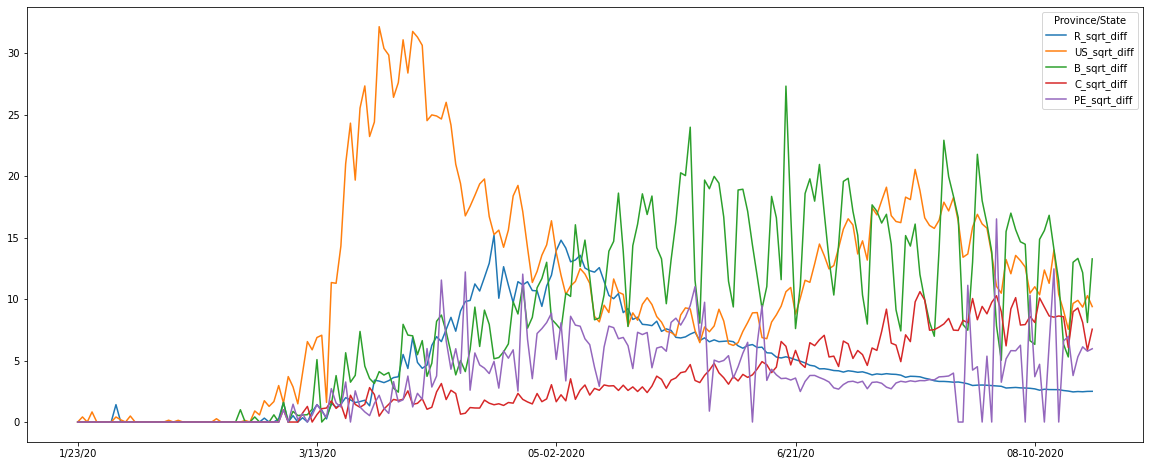

In [80]:

B_model = ARIMA(train_cases["B_sqrt_diff"],order=(5,1,2))
R_model = ARIMA(train_cases["R_sqrt_diff"],order=(2,1,1))
US_model = ARIMA(train_cases["US_sqrt_diff"],order=(3,1,5))
C_model = ARIMA(train_cases["C_sqrt_diff"],order=(1,1,3))
PE_model = ARIMA(train_cases["PE_sqrt_diff"],order=(0,1,2))
B_model= B_model.fit()
R_model = R_model.fit()
US_model = US_model.fit()
C_model=C_model.fit()
PE_model = PE_model.fit()
train_cases.plot(y=["R_sqrt_diff","US_sqrt_diff","B_sqrt_diff","C_sqrt_diff","PE_sqrt_diff"],figsize=(20,8))


PREDICTING THE NEXT 30 DAYS COVID CASES FOR 5 COUNTRIES TAKEN

In [81]:
start = len(train_cases)
end = len(train_cases)+len(test_cases)-1
R_prediction = R_model.predict(start=start,end=end,typ="levels").rename("Russia")
US_prediction = US_model.predict(start=start,end=end,typ="levels").rename("US")
B_prediction = B_model.predict(start=start,end=end,typ="levels").rename("Brazil")
C_prediction = C_model.predict(start=start,end=end,typ="levels").rename("Colombia")
PE_prediction = PE_model.predict(start=start,end=end,typ="levels").rename("Peru")
print("Russia")
print(R_prediction)
print("US")
print(US_prediction)
print("Brazil")
print(B_prediction)
print("colombia")
print(C_prediction)
print("Peru")
print(PE_prediction)
#If index is not as date then use below code
#prediction.index = highest_cases.index[start:end+1]
#print(prediction)

Russia
2020-08-23    2.489381
2020-08-24    2.487703
2020-08-25    2.484580
2020-08-26    2.482877
2020-08-27    2.481419
2020-08-28    2.480634
2020-08-29    2.480317
2020-08-30    2.480514
2020-08-31    2.481174
2020-09-01    2.482287
2020-09-02    2.483828
2020-09-03    2.485777
2020-09-04    2.488116
2020-09-05    2.490826
2020-09-06    2.493889
2020-09-07    2.497291
2020-09-08    2.501014
2020-09-09    2.505044
2020-09-10    2.509367
2020-09-11    2.513968
2020-09-12    2.518835
2020-09-13    2.523956
2020-09-14    2.529318
2020-09-15    2.534911
2020-09-16    2.540723
2020-09-17    2.546745
2020-09-18    2.552966
2020-09-19    2.559378
2020-09-20    2.565971
2020-09-21    2.572737
Freq: D, Name: Russia, dtype: float64
US
2020-08-23     8.126504
2020-08-24     7.898391
2020-08-25     8.529006
2020-08-26     9.529522
2020-08-27    10.233923
2020-08-28    10.191919
2020-08-29     9.509046
2020-08-30     8.759246
2020-08-31     8.546895
2020-09-01     9.055513
2020-09-02     9.92188

In [82]:
#checking the shape of prediction,which should be equal to test_cases size
R_prediction.shape,US_prediction.shape,B_prediction.shape,C_prediction.shape,PE_prediction.shape

((30,), (30,), (30,), (30,), (30,))

<AxesSubplot:>

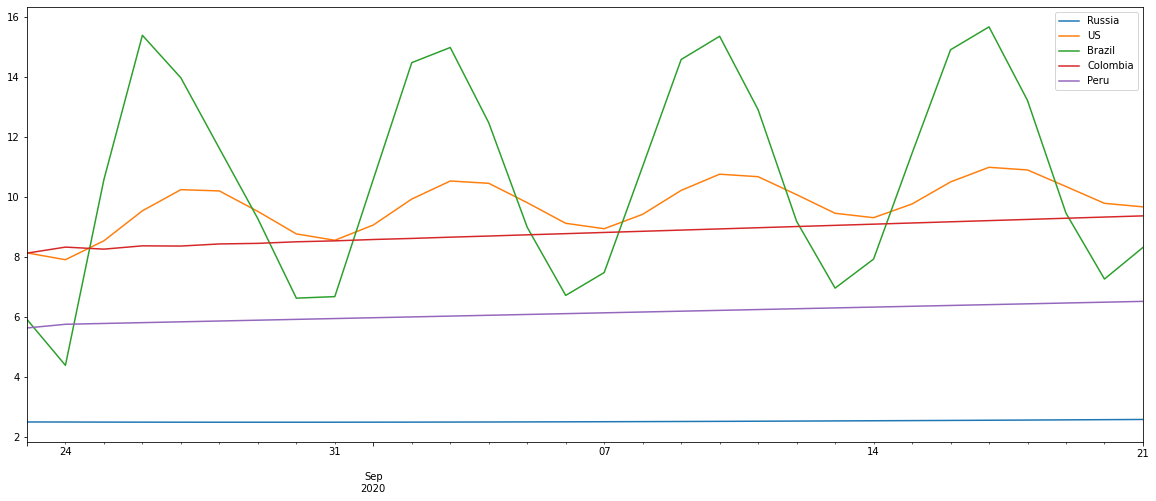

In [83]:
#Prediction plot of Russia
R_prediction.plot(figsize=(20,8),legend=True)
#Prediction plot for US
US_prediction.plot(figsize=(20,8),legend=True)
#Prediction plot for Brazil
B_prediction.plot(figsize=(20,8),legend=True)
#Prediiction plot for Colombia
C_prediction.plot(figsize=(20,8),legend=True)
#Prediction plot for Peru
PE_prediction.plot(figsize=(20,8),legend=True)

EVALUATING THE MODEL WITH PREDICTION AND TEST CASES FOR 5 COUNTRIES USING MEAN_SQUARED_ERROR METHOD

In [84]:
# Evaluation
R_result = sqrt(mean_squared_error(R_prediction,test_cases["R_sqrt_diff"]))
US_result = sqrt(mean_squared_error(US_prediction,test_cases["US_sqrt_diff"]))
B_result = sqrt(mean_squared_error(B_prediction,test_cases["B_sqrt_diff"]))
C_result = sqrt(mean_squared_error(C_prediction,test_cases["C_sqrt_diff"]))
PE_result = sqrt(mean_squared_error(PE_prediction,test_cases["PE_sqrt_diff"]))
print(R_result)
print(US_result)
print(B_result)
print(C_result)
print(PE_result)

0.13747848096620727
2.181709575451327
3.7344793334497153
4.272226414967275
2.704858061701271


AS WE GOT SMALL ERROR, WE NOW MOVE TO FIT THE ARIMA MODEL ON COMPLETE DATASET AND PREDICT THE FUTURE COVID CASES FOR NEXT 30 DAYS


In [85]:
# FITTING THE ARIMA MODEL ON 5 COUNTRIES FOR FUTURE PREDICTION
R_final_model = ARIMA(highest_cases["R_sqrt_diff"],order=(2,1,1))
R_final_model = R_final_model.fit()
US_final_model = ARIMA(highest_cases["US_sqrt_diff"],order=(3,1,5))
US_final_model = US_final_model.fit()
B_final_model = ARIMA(highest_cases["B_sqrt_diff"],order=(5,1,2))
B_final_model = B_final_model.fit()
C_final_model = ARIMA(highest_cases["C_sqrt_diff"],order=(1,1,3))
C_final_model = C_final_model.fit()
PE_final_model = ARIMA(highest_cases["PE_sqrt_diff"],order=(0,1,2))
PE_final_model = PE_final_model.fit()
#Checking the last 5 values to make the predictions after that date
highest_cases.tail()

Province/State,US,Brazil,Russia,Colombia,Peru,US_sqrt,US_sqrt_diff,R_sqrt,R_sqrt_diff,B_sqrt,B_sqrt_diff,C_sqrt,C_sqrt_diff,PE_sqrt,PE_sqrt_diff
9/17/20,6674411,4455386,1081152,743945,744400,2583.488146,8.599605,1039.784593,2.728664,2110.778529,8.617023,862.522463,4.398347,862.786184,3.705280
9/18/20,6723933,4495183,1086955,750471,750098,2593.054762,9.566616,1042.571340,2.786747,2120.184662,9.406132,866.297293,3.774830,866.081982,3.295798
9/19/20,6768119,4528240,1092915,758398,756412,2601.560878,8.506115,1045.425751,2.854410,2127.966165,7.781503,870.860494,4.563201,869.719495,3.637513
9/20/20,6804814,4544629,1098958,765076,762865,2608.603841,7.042964,1048.311976,2.886226,2131.813547,3.847382,874.686229,3.825735,873.421433,3.701938
9/21/20,6856884,4558040,1105048,770435,768895,2618.565256,9.961415,1051.212633,2.900657,2134.956674,3.143127,877.744268,3.058039,876.866581,3.445147


PREDICT THE FUTURE COVID CASES FOR NEXT 30 DAYS FROM THE LAST DATE THE DATASET ENDS AND PRINTING THE PREDICTION IN SUITABLE FORMAT FOR EASY PLOTTING(having index as dates)

In [86]:
future_dates = pd.date_range(start='2020-09-21',end='2020-10-21')
R_final_prediction = R_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Russia')
US_final_prediction = US_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('US')
B_final_prediction = B_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Brazil')
C_final_prediction = C_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Colombia')
PE_final_prediction = PE_final_model.predict(start=len(highest_cases),end=len(highest_cases)+30,typ='levels').rename('Peru')
#To convert the index to dates we do the following code
R_final_prediction.index = future_dates
US_final_prediction.index=future_dates
B_final_prediction.index = future_dates
C_final_prediction.index = future_dates
PE_final_prediction.index = future_dates
print("For Russia")
print(R_final_prediction)
print("For US")
print(US_final_prediction)
print("For Brazil")
print(B_final_prediction)
print("For Colombia")
print(C_final_prediction)
print("For Peru")
print(PE_final_prediction)

For Russia
2020-09-21    2.918282
2020-09-22    2.934350
2020-09-23    2.950761
2020-09-24    2.966774
2020-09-25    2.982694
2020-09-26    2.998412
2020-09-27    3.013983
2020-09-28    3.029395
2020-09-29    3.044664
2020-09-30    3.059792
2020-10-01    3.074788
2020-10-02    3.089657
2020-10-03    3.104405
2020-10-04    3.119038
2020-10-05    3.133561
2020-10-06    3.147980
2020-10-07    3.162299
2020-10-08    3.176523
2020-10-09    3.190656
2020-10-10    3.204702
2020-10-11    3.218666
2020-10-12    3.232552
2020-10-13    3.246362
2020-10-14    3.260101
2020-10-15    3.273772
2020-10-16    3.287377
2020-10-17    3.300921
2020-10-18    3.314406
2020-10-19    3.327834
2020-10-20    3.341208
2020-10-21    3.354532
Freq: D, Name: Russia, dtype: float64
For US
2020-09-21     8.462616
2020-09-22     9.043940
2020-09-23    10.381774
2020-09-24    10.947656
2020-09-25    10.726433
2020-09-26    10.146767
2020-09-27     9.808395
2020-09-28    10.064959
2020-09-29    10.786784
2020-09-30    1

<AxesSubplot:>

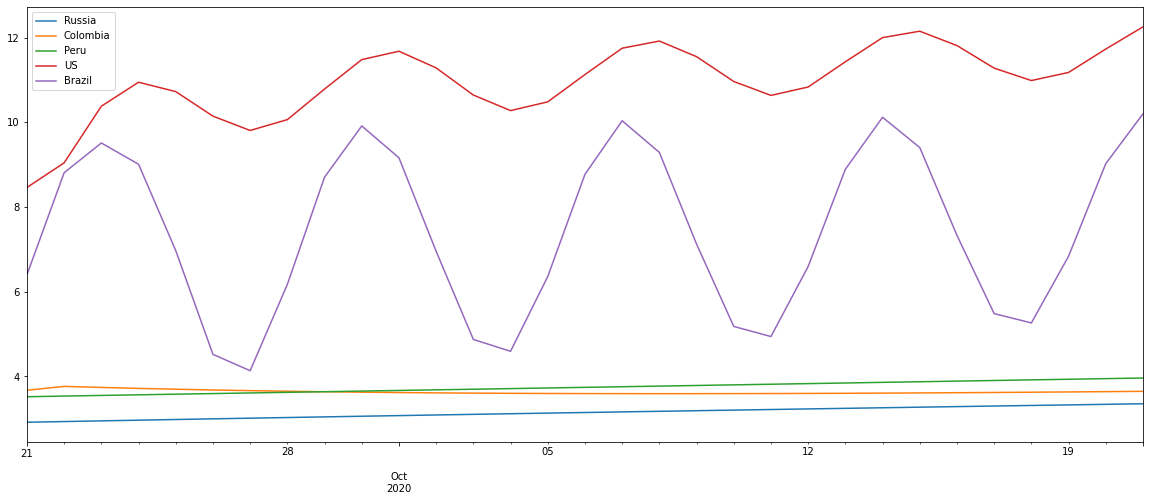

In [87]:
R_final_prediction.plot(figsize=(20,8),legend=True)
C_final_prediction.plot(figsize=(20,8),legend=True)
PE_final_prediction.plot(figsize=(20,8),legend=True)
US_final_prediction.plot(figsize=(20,8),legend=True)
B_final_prediction.plot(figsize=(20,8),legend=True)

THE PREVIOUS GRAPH INDICATES THE TRANSFORMED ONE, BUT INORDER TO FIND THE EXACT FUTURE COVID CASES WE NEED TO BACK TRANSFORM THE DATA, WHICH IS DONE IN THE FOLLOWING

In [88]:
US_back_trans = np.cumsum(highest_cases["US_sqrt_diff"])
highest_cases["US_back_transformed"] = US_back_trans**2
R_back_trans = np.cumsum(highest_cases["R_sqrt_diff"])
highest_cases["R_back_transformed"] = R_back_trans**2
B_back_trans = np.cumsum(highest_cases["B_sqrt_diff"])
highest_cases["B_back_transformed"] = B_back_trans**2
C_back_trans = np.cumsum(highest_cases["C_sqrt_diff"])
highest_cases["C_back_transformed"] = C_back_trans**2
PE_back_trans = np.cumsum(highest_cases["PE_sqrt_diff"])
highest_cases["PE_back_transformed"] = PE_back_trans**2
highest_cases.head()

Province/State,US,Brazil,Russia,Colombia,Peru,US_sqrt,US_sqrt_diff,R_sqrt,R_sqrt_diff,B_sqrt,B_sqrt_diff,C_sqrt,C_sqrt_diff,PE_sqrt,PE_sqrt_diff,US_back_transformed,R_back_transformed,B_back_transformed,C_back_transformed,PE_back_transformed
1/23/20,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1/24/20,2,0,0,0,0,1.414214,0.414214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171573,0.0,0.0,0.0,0.0
1/25/20,2,0,0,0,0,1.414214,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171573,0.0,0.0,0.0,0.0
1/26/20,5,0,0,0,0,2.236068,0.821854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.527864,0.0,0.0,0.0,0.0
1/27/20,5,0,0,0,0,2.236068,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.527864,0.0,0.0,0.0,0.0


FITTING THE BACK TRANSFORMED MODEL USING ARIMA

In [89]:
#US
US_final = ARIMA(highest_cases["US_back_transformed"],order=(3,1,5))
US_final_fit = US_final.fit(disp=0)
#RUSSIA
R_final = ARIMA(highest_cases["R_back_transformed"],order=(2,1,1))
R_final_fit = R_final.fit(disp=0)
#BRAZIL
B_final = ARIMA(highest_cases["B_back_transformed"],order=(5,1,2))
B_final_fit = B_final.fit(disp=0)
#COLOMBIA
C_final = ARIMA(highest_cases["C_back_transformed"],order=(1,1,3))
C_final_fit = C_final.fit(disp=0)
#PERU
PE_final = ARIMA(highest_cases["PE_back_transformed"],order=(0,1,2))
PE_final_fit = PE_final.fit(disp=0)

PREDICTING THE FUTURE VALUES OF 5 COUNTRIES AND PLOTTING IN ORIGINAL SCALE 

<AxesSubplot:>

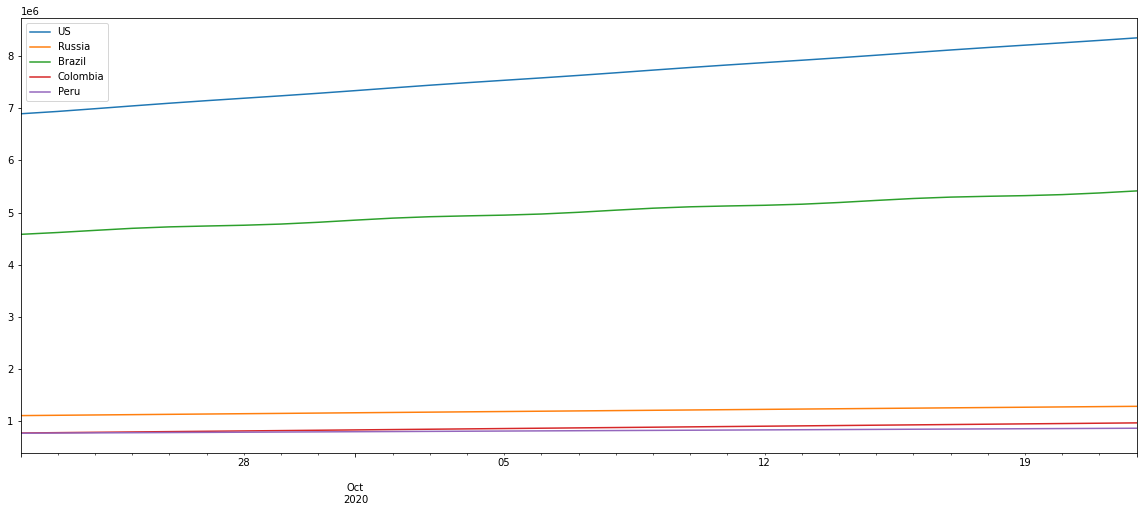

In [90]:
US_back_prediction = US_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("US")
US_back_prediction.plot(figsize=(20,8),legend=True)
R_back_predictions = R_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Russia")
R_back_predictions.plot(figsize=(20,8),legend=True)
B_back_predictions = B_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Brazil")
B_back_predictions.plot(figsize=(20,8),legend=True)
C_back_predictions = C_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Colombia")
C_back_predictions.plot(figsize=(20,8),legend=True)
PE_back_predictions = PE_final_fit.predict(start=len(highest_cases),end=len(highest_cases)+30,typ="levels").rename("Peru")
PE_back_predictions.plot(figsize=(20,8),legend=True)

2. USING MACHINE LEARNING MODELS

TO PREDICT WE USE THE PAST DATA AND COMBINE THOSE TO MAKE PREDICTIONS ON TEST SET FOR 3 DIFFERENT COUNTRIES TAKEN

In [91]:
#FOR US
highest_cases["beforeday US"] = highest_cases["US"].shift(+1)
highest_cases["2daysbefore US"] = highest_cases["US"].shift(+2)
highest_cases["3daysbefore US"] = highest_cases["US"].shift(+3)
highest_cases["4daysbefore US"] = highest_cases["US"].shift(+4)
# FOR RUSSIA
highest_cases["beforeday R"] = highest_cases["Russia"].shift(+1)
highest_cases["2daysbefore R"] = highest_cases["Russia"].shift(+2)
highest_cases["3daysbefore R"] = highest_cases["Russia"].shift(+3)
highest_cases["4daysbefore R"] = highest_cases["Russia"].shift(+4)
#FOR BRAZIL
highest_cases["beforeday BR"] = highest_cases["Brazil"].shift(+1)
highest_cases["2daysbefore BR"] = highest_cases["Brazil"].shift(+2)
highest_cases["3daysbefore BR"] = highest_cases["Brazil"].shift(+3)
highest_cases["4daysbefore BR"] = highest_cases["Brazil"].shift(+4)
highest_cases.head()

Province/State,US,Brazil,Russia,Colombia,Peru,US_sqrt,US_sqrt_diff,R_sqrt,R_sqrt_diff,B_sqrt,...,3daysbefore US,4daysbefore US,beforeday R,2daysbefore R,3daysbefore R,4daysbefore R,beforeday BR,2daysbefore BR,3daysbefore BR,4daysbefore BR
1/23/20,1,0,0,0,0,1.000000,0.000000,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1/24/20,2,0,0,0,0,1.414214,0.414214,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1/25/20,2,0,0,0,0,1.414214,0.000000,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1/26/20,5,0,0,0,0,2.236068,0.821854,0.0,0.0,0.0,...,1.0,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
1/27/20,5,0,0,0,0,2.236068,0.000000,0.0,0.0,0.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


REMOVING THE NAN VALUES IN THE DATASET

In [92]:
highest_cases = highest_cases.dropna()
highest_cases

Province/State,US,Brazil,Russia,Colombia,Peru,US_sqrt,US_sqrt_diff,R_sqrt,R_sqrt_diff,B_sqrt,...,3daysbefore US,4daysbefore US,beforeday R,2daysbefore R,3daysbefore R,4daysbefore R,beforeday BR,2daysbefore BR,3daysbefore BR,4daysbefore BR
1/27/20,5,0,0,0,0,2.236068,0.000000,0.000000,0.000000,0.000000,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/28/20,5,0,0,0,0,2.236068,0.000000,0.000000,0.000000,0.000000,...,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/29/20,5,0,0,0,0,2.236068,0.000000,0.000000,0.000000,0.000000,...,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/30/20,5,0,0,0,0,2.236068,0.000000,0.000000,0.000000,0.000000,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1/31/20,7,0,2,0,0,2.645751,0.409683,1.414214,1.414214,0.000000,...,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9/17/20,6674411,4455386,1081152,743945,744400,2583.488146,8.599605,1039.784593,2.728664,2110.778529,...,6553652.0,6520122.0,1075485.0,1069873.0,1064438.0,1059024.0,4419083.0,4382263.0,4345610.0,4330455.0
9/18/20,6723933,4495183,1086955,750471,750098,2593.054762,9.566616,1042.571340,2.786747,2120.184662,...,6592342.0,6553652.0,1081152.0,1075485.0,1069873.0,1064438.0,4455386.0,4419083.0,4382263.0,4345610.0
9/19/20,6768119,4528240,1092915,758398,756412,2601.560878,8.506115,1045.425751,2.854410,2127.966165,...,6630051.0,6592342.0,1086955.0,1081152.0,1075485.0,1069873.0,4495183.0,4455386.0,4419083.0,4382263.0
9/20/20,6804814,4544629,1098958,765076,762865,2608.603841,7.042964,1048.311976,2.886226,2131.813547,...,6674411.0,6630051.0,1092915.0,1086955.0,1081152.0,1075485.0,4528240.0,4495183.0,4455386.0,4419083.0


CONVERT THE ADDED COLUMN VALUES TO INT FOR 3 COUNTRIES

In [93]:
#FOR US
highest_cases["beforeday US"]=highest_cases["beforeday US"].astype(int)
highest_cases["2daysbefore US"] = highest_cases["2daysbefore US"].astype(int)
highest_cases["3daysbefore US"] = highest_cases["3daysbefore US"].astype(int)
highest_cases["4daysbefore US"] = highest_cases["4daysbefore US"].astype(int)
#FOR RUSSIA
highest_cases["beforeday R"]   = highest_cases["beforeday R"].astype(int)
highest_cases["2daysbefore R"] = highest_cases["2daysbefore R"].astype(int)
highest_cases["3daysbefore R"] = highest_cases["3daysbefore R"].astype(int)
highest_cases["4daysbefore R"] = highest_cases["4daysbefore R"].astype(int)
#FOR BRAZIL
highest_cases["beforeday BR"]   = highest_cases["beforeday BR"].astype(int)
highest_cases["2daysbefore BR"] = highest_cases["2daysbefore BR"].astype(int)
highest_cases["3daysbefore BR"] = highest_cases["3daysbefore BR"].astype(int)
highest_cases["4daysbefore BR"] = highest_cases["4daysbefore BR"].astype(int)

NOW COMBINE THESE CREATED COLUMNS AND PREPARE TRAIN AND TEST SETS

In [94]:
#US
x1_US,x2_US,x3_US,x4_US,y_US = highest_cases["beforeday US"],highest_cases["2daysbefore US"],highest_cases["3daysbefore US"],highest_cases["4daysbefore US"],highest_cases["US"]
x1_US,x2_US,x3_US,x4_US,y_US = np.array(x1_US),np.array(x2_US),np.array(x3_US),np.array(x4_US),np.array(y_US)
x1_US,x2_US,x3_US,x4_US,y_US = x1_US.reshape(-1,1),x2_US.reshape(-1,1),x3_US.reshape(-1,1),x4_US.reshape(-1,1),y_US.reshape(-1,1)
x_US = np.concatenate((x1_US,x2_US,x3_US,x4_US),axis=1)
#print(x_US)
# INDIA
x1_R,x2_R,x3_R,x4_R,y_R = highest_cases["beforeday R"],highest_cases["2daysbefore R"],highest_cases["3daysbefore R"],highest_cases["4daysbefore R"],highest_cases["Russia"]
x1_R,x2_R,x3_R,x4_R,y_R = np.array(x1_R),np.array(x2_R),np.array(x3_R),np.array(x4_R),np.array(y_R)
x1_R,x2_R,x3_R,x4_R,y_R = x1_R.reshape(-1,1),x2_R.reshape(-1,1),x3_R.reshape(-1,1),x4_R.reshape(-1,1),y_R.reshape(-1,1)
x_R = np.concatenate((x1_R,x2_R,x3_R,x4_R),axis=1)
#print(x_IN)
#BRAZIL
x1_BR,x2_BR,x3_BR,x4_BR,y_BR = highest_cases["beforeday BR"],highest_cases["2daysbefore BR"],highest_cases["3daysbefore BR"],highest_cases["4daysbefore BR"],highest_cases["Brazil"]
x1_BR,x2_BR,x3_BR,x4_BR,y_BR = np.array(x1_BR),np.array(x2_BR),np.array(x3_BR),np.array(x4_BR),np.array(y_BR)
x1_BR,x2_BR,x3_BR,x4_BR,y_BR = x1_BR.reshape(-1,1),x2_BR.reshape(-1,1),x3_BR.reshape(-1,1),x4_BR.reshape(-1,1),y_BR.reshape(-1,1)
x_BR = np.concatenate((x1_BR,x2_BR,x3_BR,x4_BR),axis=1)
#print(x_BR)

SPILLTING THE DATA INTO TRAIN AND TEST FOR 3 COUNTRIES

In [95]:
x_US_train,x_US_test,y_US_train,y_US_test = x_US[:-30],x_US[-30:],y_US[:-30],y_US[-30:]
x_R_train,x_R_test,y_R_train,y_R_test = x_R[:-30],x_R[-30:],y_R[:-30],y_R[-30:]
x_BR_train,x_BR_test,y_BR_train,y_BR_test = x_BR[:-30],x_BR[-30:],y_BR[:-30],y_BR[-30:]

WORKING ON DIFFERENT MODELS AND SEE WHICH HAS LESS ERROR 

In [96]:
linear_model = LinearRegression()
random_forest = RandomForestRegressor(n_estimators=100,max_features=3,random_state=1)
KNN_model = KNeighborsRegressor(n_neighbors=4)
tree_model = DecisionTreeRegressor(max_features=3)

FITTING THE TRAIN SET ON DIFFERENT MODELS TAKEN

In [97]:
#US
linear_model.fit(x_US_train,y_US_train)
random_forest.fit(x_US_train,y_US_train)
KNN_model.fit(x_US_train,y_US_train)
tree_model.fit(x_US_train,y_US_train)
#RUSSIA
linear_model.fit(x_R_train,y_R_train)
random_forest.fit(x_R_train,y_R_train)
KNN_model.fit(x_R_train,y_R_train)
tree_model.fit(x_R_train,y_R_train)
#BRAZIL
linear_model.fit(x_BR_train,y_BR_train)
random_forest.fit(x_BR_train,y_BR_train)
KNN_model.fit(x_BR_train,y_BR_train)
tree_model.fit(x_BR_train,y_BR_train)


DecisionTreeRegressor(max_features=3)

PREDICTIONS ON DIFFERENT MODELS

In [98]:
pred_US = linear_model.predict(x_US_test)
pred1_US = random_forest.predict(x_US_test)
pred2_US = KNN_model.predict(x_US_test)
pred3_US = tree_model.predict(x_US_test)

EVALUATE THE MODEL AND CHECK THE MEAN SQUARED ERROR FOR EACH MODEL AND PLOT THE ONE WHICH HAS LESS ERROR

In [99]:
print(np.sqrt(mean_squared_error(y_US_test,pred_US)))
print(np.sqrt(mean_squared_error(y_US_test,pred1_US)))
print(np.sqrt(mean_squared_error(y_US_test,pred2_US)))
print(np.sqrt(mean_squared_error(y_US_test,pred3_US)))

20883.856535842177
2737921.770359164
2778877.9093827023
2715324.7398392027


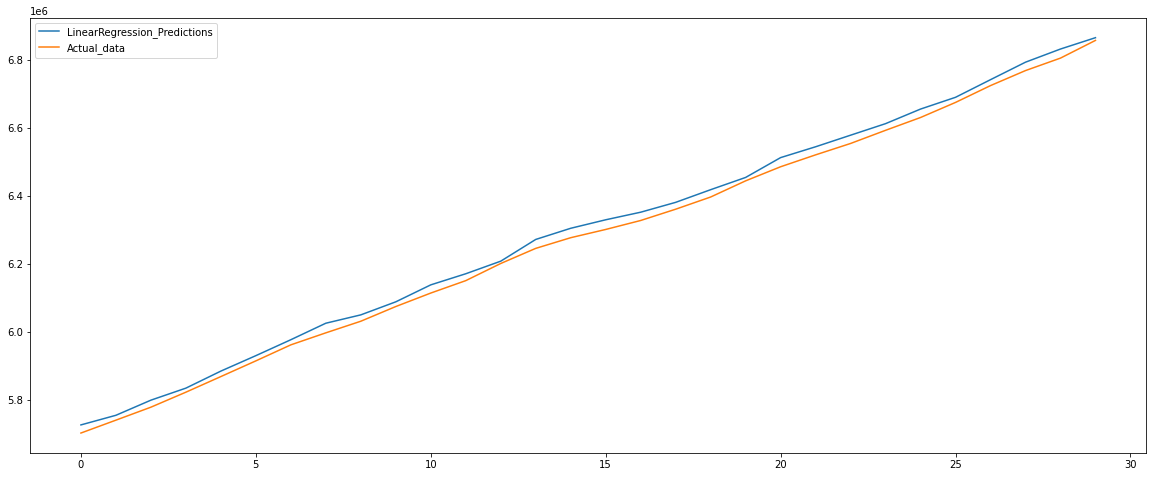

In [100]:
# As in the previous step we got LinearRegression  model error low, we plot for understanding 
plt.plot(pred_US,label="LinearRegression_Predictions")
plt.plot(y_US_test,label="Actual_data")
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

In [101]:
pred_R = linear_model.predict(x_R_test)
pred1_R = random_forest.predict(x_R_test)
pred2_R = KNN_model.predict(x_R_test)
pred3_R = tree_model.predict(x_R_test)


In [102]:
# As in the previous step we got LinearRegression  model error low, we plot for understanding 
print(np.sqrt(mean_squared_error(y_R_test,pred_R)))
print(np.sqrt(mean_squared_error(y_R_test,pred1_R)))
print(np.sqrt(mean_squared_error(y_R_test,pred2_R)))
print(np.sqrt(mean_squared_error(y_R_test,pred3_R)))

5352.315362235062
68615.93587563814
68129.00554562217
71576.2277619695


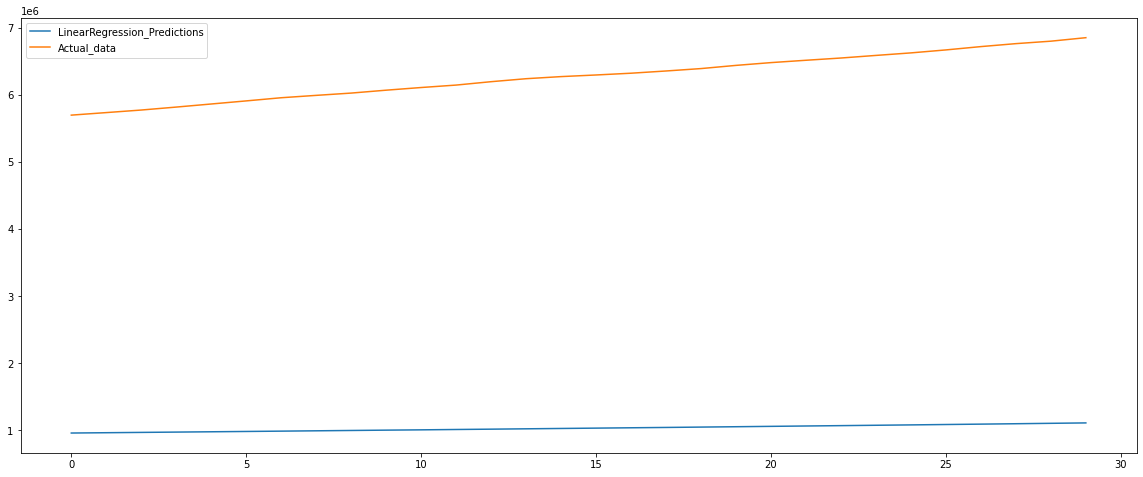

In [109]:
plt.plot(pred_R,label="LinearRegression_Predictions")
plt.plot(y_US_test,label="Actual_data")
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()

In [104]:
pred_BR = linear_model.predict(x_BR_test)
pred1_BR = random_forest.predict(x_BR_test)
pred2_BR = KNN_model.predict(x_BR_test)
pred3_BR = tree_model.predict(x_BR_test)

In [105]:
# As in the previous step we got LinearRegression  model error low, we plot for understanding 
print(np.sqrt(mean_squared_error(y_BR_test,pred_BR)))
print(np.sqrt(mean_squared_error(y_BR_test,pred1_BR)))
print(np.sqrt(mean_squared_error(y_BR_test,pred2_BR)))
print(np.sqrt(mean_squared_error(y_BR_test,pred3_BR)))

17775.450497342896
628051.208937742
665015.3818047212
607889.9862390398


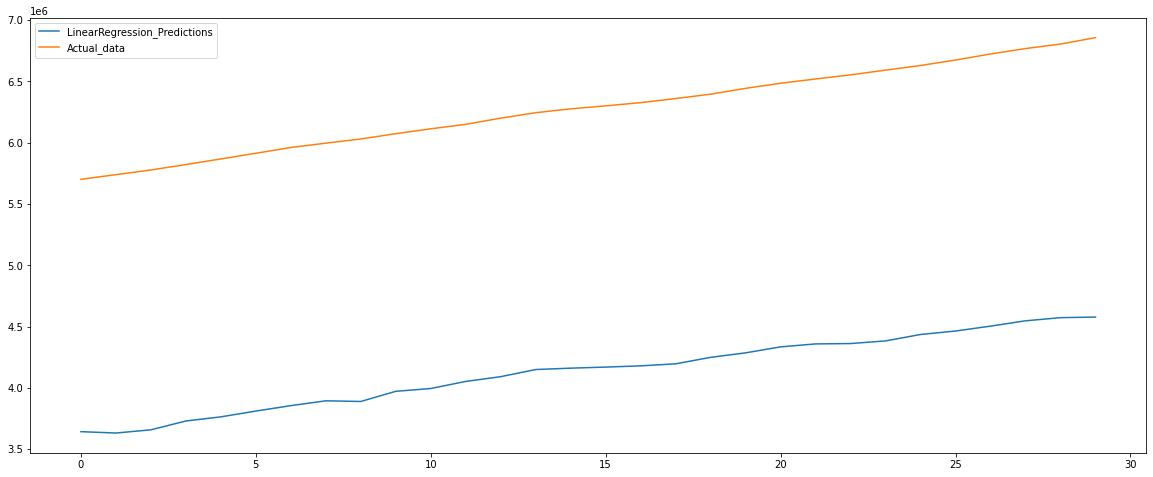

In [106]:
plt.plot(pred_BR,label="LinearRegression_Predictions")
plt.plot(y_US_test,label="Actual_data")
plt.rcParams["figure.figsize"] = (20,8)
plt.legend()
plt.show()